In [ ]:
!pip install -q gradio_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.1 MB/s eta 0:00:00


In [ ]:
import os
os.environ["HF_API_TOKEN"] = ""

In [ ]:
from gradio_client import Client, file

client = Client("Nymbo/Virtual-Try-On")

Loaded as API: https://nymbo-virtual-try-on.hf.space ✔


In [ ]:
import requests
from vertexai.vision_models import Image
def download_image(model, garment):
    response = requests.get(model)
    with open("model.jpg", "wb") as file:
      file.write(response.content)
    response = requests.get(garment)
    with open("garment.jpg", "wb") as file:
      file.write(response.content)


In [ ]:
download_image("https://prod-img.thesouledstore.com/public/theSoul/uploads/catalog/product/1729261002_3112440.jpg?format=webp&w=480&dpr=0.9","https://prod-img.thesouledstore.com/public/theSoul/uploads/catalog/product/1729309603_2027035.jpg?format=webp&w=480&dpr=0.9")
result = client.predict(
		dict={"background":file("model.jpg"),"layers":[],"composite":None},
		garm_img=file("garment.jpg"),
		garment_des="Hello!!",
		is_checked=True,
		is_checked_crop=False,
		denoise_steps=30,
		seed=42,
		api_name="/tryon"
)
os.remove("model.jpg")
os.remove("garment.jpg")
print(result)

/usr/local/lib/python3.10/dist-packages/gradio_client/utils.py:1115: UserWarning: file() is deprecated and will be removed in a future version. Use handle_file() instead.
  warnings.warn(


('/tmp/gradio/84586fe1b7e5694393879c0e670018f25ee81ffb5617cb1bc7240d0e3d391567/image.png', '/tmp/gradio/e50c38cd1642a7f383357f736ee04ade7fdba39addc7658c20d42ff590263694/image.png')


In [ ]:
result[0]

'/tmp/gradio/523d28166d91da869f828809e921915ad30a10a225df4f9967a85bcee8d293eb/image.png'

In [ ]:
!ls

image.png


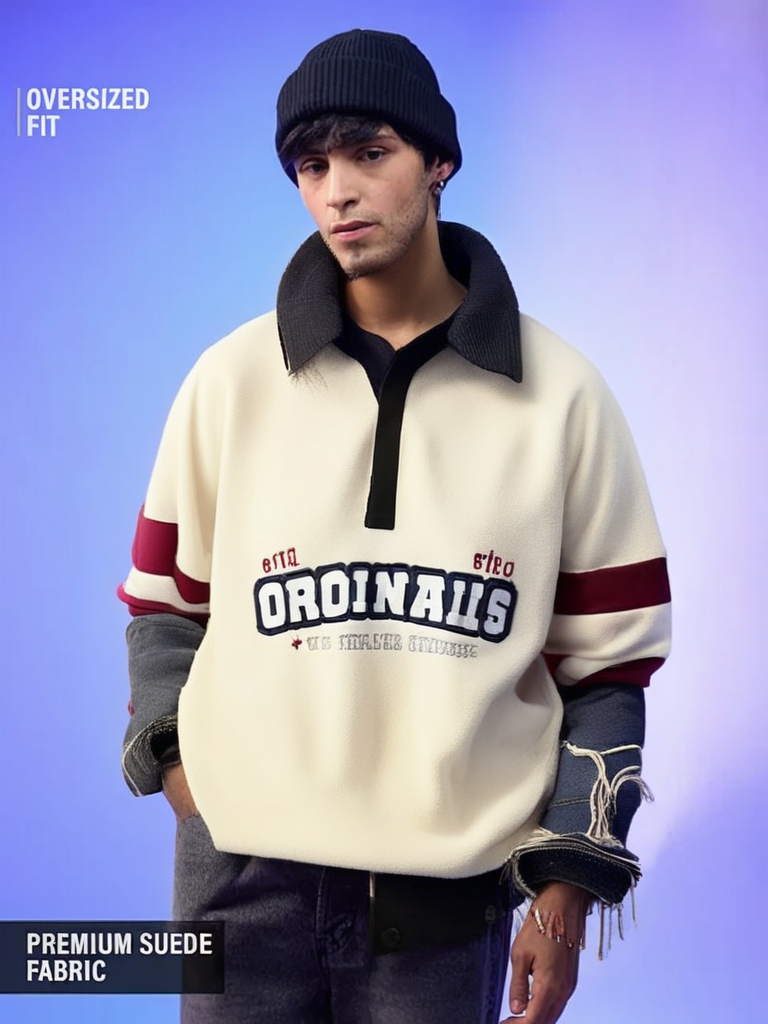

In [ ]:
from IPython.display import Image
Image(result[0])